In [1]:
"""import pandas as pd
from pathlib import Path
import gc

# Definir o caminho do diretório
diretorio = Path('/Users/filipecarvalho/Documents/data_science_projects/BMD/paper/Computers_in_Biology_and_Medicine/NHANES/NHANES_2013_2014')

# Verificar se o diretório existe
if not diretorio.exists():
    print(f"O diretório {diretorio} não existe.")
    exit()

# Lista para armazenar os nomes dos arquivos válidos
arquivos_validos = []

# Primeira passagem: identificar arquivos válidos e o DataFrame base
df_base = None
max_rows = 0

for ficheiro in diretorio.glob('*.XPT'):
    try:
        df = pd.read_sas(ficheiro, format='xport')
        nome_arquivo = ficheiro.stem
        
        if 'SEQN' in df.columns:
            arquivos_validos.append(nome_arquivo)
            print(f"Arquivo válido: {nome_arquivo}, Shape: {df.shape}, SEQNs únicos: {df['SEQN'].nunique()}")
            
            if len(df) > max_rows:
                max_rows = len(df)
                df_base = df[['SEQN']].drop_duplicates()
                print(f"Novo DataFrame base: {nome_arquivo}, SEQNs únicos: {df_base['SEQN'].nunique()}")
        else:
            print(f"Aviso: O arquivo {nome_arquivo} não contém a coluna SEQN e será ignorado.")
        
        del df
        gc.collect()
    except Exception as e:
        print(f"Erro ao ler {ficheiro}: {str(e)}")

if not arquivos_validos:
    print("Nenhum arquivo .XPT válido encontrado no diretório.")
    exit()

print(f"\nDataFrame base: Shape {df_base.shape}, SEQNs únicos: {df_base['SEQN'].nunique()}")

# Função para lidar com colunas duplicadas
def handle_duplicates(df, nome_arquivo):
    # Renomeia todas as colunas (exceto SEQN) com um prefixo único
    rename_dict = {col: f"{nome_arquivo}_{col}" for col in df.columns if col != 'SEQN'}
    df = df.rename(columns=rename_dict)
    return df

# Segunda passagem: mesclar os DataFrames
for nome_arquivo in arquivos_validos:
    print(f"\nProcessando {nome_arquivo}...")
    df = pd.read_sas(diretorio / f"{nome_arquivo}.XPT", format='xport')
    
    # Garantir que SEQN seja único neste DataFrame
    df = df.sort_values('SEQN').groupby('SEQN').first().reset_index()
    
    # Lidar com colunas duplicadas
    df = handle_duplicates(df, nome_arquivo)
    
    print(f"Shape de {nome_arquivo} antes do merge: {df.shape}, SEQNs únicos: {df['SEQN'].nunique()}")
    
    # Usar merge sem sufixos, já que todas as colunas têm nomes únicos agora
    df_final = pd.merge(df_base, df, on='SEQN', how='left')
    
    print(f"Shape após mesclar {nome_arquivo}: {df_final.shape}, SEQNs únicos: {df_final['SEQN'].nunique()}")
    
    df_base = df_final
    del df, df_final
    gc.collect()

# Verificar o resultado final
print("\nShape final do DataFrame:")
print(df_base.shape)
print(f"SEQNs únicos no DataFrame final: {df_base['SEQN'].nunique()}")

print("\nPrimeiras linhas do DataFrame final:")
print(df_base.head())

print("\nVerificando duplicatas de SEQN:")
duplicatas = df_base['SEQN'].duplicated().sum()
print(f"Número de SEQNs duplicados: {duplicatas}")

# Contar o número de NaNs para DXXNKBMD, DXXOFBMD e DXXOSBMD
colunas_dmo = ['DXXNKBMD', 'DXXOFBMD', 'DXXOSBMD']
for coluna in colunas_dmo:
    colunas_correspondentes = [col for col in df_base.columns if col.endswith(coluna)]
    for col in colunas_correspondentes:
        nans = df_base[col].isna().sum()
        print(f"\nNúmero de NaNs em {col}: {nans}")
        print(f"Percentagem de NaNs em {col}: {nans/len(df_base)*100:.2f}%")

# Salvar o DataFrame final
df_base.head()
df_base.shape"""

'import pandas as pd\nfrom pathlib import Path\nimport gc\n\n# Definir o caminho do diretório\ndiretorio = Path(\'/Users/filipecarvalho/Documents/data_science_projects/BMD/paper/Computers_in_Biology_and_Medicine/NHANES/NHANES_2013_2014\')\n\n# Verificar se o diretório existe\nif not diretorio.exists():\n    print(f"O diretório {diretorio} não existe.")\n    exit()\n\n# Lista para armazenar os nomes dos arquivos válidos\narquivos_validos = []\n\n# Primeira passagem: identificar arquivos válidos e o DataFrame base\ndf_base = None\nmax_rows = 0\n\nfor ficheiro in diretorio.glob(\'*.XPT\'):\n    try:\n        df = pd.read_sas(ficheiro, format=\'xport\')\n        nome_arquivo = ficheiro.stem\n        \n        if \'SEQN\' in df.columns:\n            arquivos_validos.append(nome_arquivo)\n            print(f"Arquivo válido: {nome_arquivo}, Shape: {df.shape}, SEQNs únicos: {df[\'SEQN\'].nunique()}")\n            \n            if len(df) > max_rows:\n                max_rows = len(df)\n       

In [2]:
"""
df_base.to_csv('df_merge_NHANES_13_14.csv', index=False)"""

"\ndf_base.to_csv('df_merge_NHANES_13_14.csv', index=False)"

In [3]:
import pandas as pd
df=pd.read_csv("/Users/filipecarvalho/Documents/data_science_projects/BMD/paper/Computers_in_Biology_and_Medicine/NHANES/df_merge_NHANES_13_14.csv")

In [4]:
# Supondo que o seu dataframe se chama df
df = df.dropna(subset=["DXXFEM_H_DXXNKBMD", 'DXXFEM_H_DXXOFBMD', 'DXXSPN_H_DXXOSBMD'], how='all')

In [5]:
import pandas as pd

# Supondo que o seu dataframe se chama df
cols = ["DXXFEM_H_DXXNKBMD", 'DXXFEM_H_DXXOFBMD', 'DXXSPN_H_DXXOSBMD']

# Calcula a percentagem de NaNs por coluna
percent_nan = df[cols].isna().mean() * 100

# Exibe a percentagem de NaNs para cada coluna
print(percent_nan)


DXXFEM_H_DXXNKBMD     3.479471
DXXFEM_H_DXXOFBMD     3.479471
DXXSPN_H_DXXOSBMD    34.168406
dtype: float64


In [6]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df[["DXXFEM_H_DXXNKBMD", 'DXXFEM_H_DXXOFBMD', 'DXXSPN_H_DXXOSBMD']] = imputer.fit_transform(df[["DXXFEM_H_DXXNKBMD", 'DXXFEM_H_DXXOFBMD', 'DXXSPN_H_DXXOSBMD']])


In [7]:
import pandas as pd

# Lista de variáveis que você está procurando
variaveis_procuradas = ["DEMO_H_RIAGENDR", "DEMO_H_RIDRETH1", "DXXFEM_H_DXXNKBMD", 'DXXFEM_H_DXXOFBMD', 'DXXSPN_H_DXXOSBMD']

# Função para encontrar colunas que terminam com o nome da variável
def encontrar_colunas(df, var):
    return [col for col in df.columns if col.endswith(var)]

# Procurar cada variável
for var in variaveis_procuradas:
    colunas_encontradas = encontrar_colunas(df, var)
    if colunas_encontradas:
        print(f"A variável '{var}' foi encontrada nas seguintes colunas:")
        for col in colunas_encontradas:
            print(f"  - {col}")
        print(f"  Número de valores não nulos: {df[colunas_encontradas[0]].notnull().sum()}")
        print(f"  Primeiros valores não nulos: {df[colunas_encontradas[0]].dropna().head().tolist()}")
    else:
        print(f"A variável '{var}' não foi encontrada em nenhuma coluna.")
    print()

# Verificar o número total de linhas no DataFrame
print(f"Número total de linhas no DataFrame: {len(df)}")

# Verificar o número de valores únicos de SEQN
print(f"Número de valores únicos de SEQN: {df['SEQN'].nunique()}")

A variável 'DEMO_H_RIAGENDR' foi encontrada nas seguintes colunas:
  - DEMO_H_RIAGENDR
  Número de valores não nulos: 2874
  Primeiros valores não nulos: [1.0, 1.0, 2.0, 1.0, 2.0]

A variável 'DEMO_H_RIDRETH1' foi encontrada nas seguintes colunas:
  - DEMO_H_RIDRETH1
  Número de valores não nulos: 2874
  Primeiros valores não nulos: [4.0, 3.0, 3.0, 1.0, 3.0]

A variável 'DXXFEM_H_DXXNKBMD' foi encontrada nas seguintes colunas:
  - DXXFEM_H_DXXNKBMD
  Número de valores não nulos: 2874
  Primeiros valores não nulos: [0.8392, 0.815, 0.722, 0.896, 0.806]

A variável 'DXXFEM_H_DXXOFBMD' foi encontrada nas seguintes colunas:
  - DXXFEM_H_DXXOFBMD
  Número de valores não nulos: 2874
  Primeiros valores não nulos: [0.9986, 0.991, 0.822, 1.173, 0.93]

A variável 'DXXSPN_H_DXXOSBMD' foi encontrada nas seguintes colunas:
  - DXXSPN_H_DXXOSBMD
  Número de valores não nulos: 2874
  Primeiros valores não nulos: [1.081, 0.894, 0.9314, 1.219, 1.076]

Número total de linhas no DataFrame: 2874
Número de

In [9]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is named df_final

# Reference values for different racial/ethnic groups
# These are approximate values and should be replaced with more accurate ones if available

# Femoral Neck
fn_white_female_mean, fn_white_female_sd = 0.858, 0.120
fn_white_male_mean, fn_white_male_sd = 0.934, 0.138
fn_black_female_mean, fn_black_female_sd = 0.938, 0.122
fn_black_male_mean, fn_black_male_sd = 1.010, 0.150
fn_hispanic_female_mean, fn_hispanic_female_sd = 0.849, 0.110
fn_hispanic_male_mean, fn_hispanic_male_sd = 0.912, 0.128

# Total Femur
tf_white_female_mean, tf_white_female_sd = 0.940, 0.122
tf_white_male_mean, tf_white_male_sd = 1.026, 0.144
tf_black_female_mean, tf_black_female_sd = 1.017, 0.130
tf_black_male_mean, tf_black_male_sd = 1.108, 0.156
tf_hispanic_female_mean, tf_hispanic_female_sd = 0.927, 0.113
tf_hispanic_male_mean, tf_hispanic_male_sd = 1.004, 0.134

# Total Spine (L1-L4)
sp_white_female_mean, sp_white_female_sd = 1.047, 0.110
sp_white_male_mean, sp_white_male_sd = 1.115, 0.115
sp_black_female_mean, sp_black_female_sd = 1.089, 0.120
sp_black_male_mean, sp_black_male_sd = 1.160, 0.125
sp_hispanic_female_mean, sp_hispanic_female_sd = 1.033, 0.105
sp_hispanic_male_mean, sp_hispanic_male_sd = 1.095, 0.110

def calculate_t_score(bmd, mean, sd):
    return (bmd - mean) / sd

def get_reference_values(gender, race, site):
    if gender == 2:  # Female
        if race in [1, 2]:  # Hispanic
            return {
                'fn': (fn_hispanic_female_mean, fn_hispanic_female_sd),
                'tf': (tf_hispanic_female_mean, tf_hispanic_female_sd),
                'sp': (sp_hispanic_female_mean, sp_hispanic_female_sd)
            }[site]
        elif race == 4:  # Black
            return {
                'fn': (fn_black_female_mean, fn_black_female_sd),
                'tf': (tf_black_female_mean, tf_black_female_sd),
                'sp': (sp_black_female_mean, sp_black_female_sd)
            }[site]
        else:  # White and others
            return {
                'fn': (fn_white_female_mean, fn_white_female_sd),
                'tf': (tf_white_female_mean, tf_white_female_sd),
                'sp': (sp_white_female_mean, sp_white_female_sd)
            }[site]
    else:  # Male
        if race in [1, 2]:  # Hispanic
            return {
                'fn': (fn_hispanic_male_mean, fn_hispanic_male_sd),
                'tf': (tf_hispanic_male_mean, tf_hispanic_male_sd),
                'sp': (sp_hispanic_male_mean, sp_hispanic_male_sd)
            }[site]
        elif race == 4:  # Black
            return {
                'fn': (fn_black_male_mean, fn_black_male_sd),
                'tf': (tf_black_male_mean, tf_black_male_sd),
                'sp': (sp_black_male_mean, sp_black_male_sd)
            }[site]
        else:  # White and others
            return {
                'fn': (fn_white_male_mean, fn_white_male_sd),
                'tf': (tf_white_male_mean, tf_white_male_sd),
                'sp': (sp_white_male_mean, sp_white_male_sd)
            }[site]

# Calculate T-scores
for site, column in zip(['fn', 'tf', 'sp'], ["DXXFEM_H_DXXNKBMD", 'DXXFEM_H_DXXOFBMD', 'DXXSPN_H_DXXOSBMD']):
    df[f'T_score_{site}'] = df.apply(
        lambda row: calculate_t_score(
            row[column], 
            *get_reference_values(row['DEMO_H_RIAGENDR'], row['DEMO_H_RIDRETH1'], site)
        ) if pd.notnull(row[column]) else np.nan, 
        axis=1
    )

# Print the first few rows to check the results
print(df[["DEMO_H_RIAGENDR", "DEMO_H_RIDRETH1", "DXXFEM_H_DXXNKBMD", 'DXXFEM_H_DXXOFBMD', 'DXXSPN_H_DXXOSBMD',
                'T_score_fn', 'T_score_tf', 'T_score_sp']].head())

# You can also check the description of the new columns
print(df[['T_score_fn', 'T_score_tf', 'T_score_sp']].describe())

   DEMO_H_RIAGENDR  DEMO_H_RIDRETH1  DXXFEM_H_DXXNKBMD  DXXFEM_H_DXXOFBMD  \
0              1.0              4.0             0.8392             0.9986   
1              1.0              3.0             0.8150             0.9910   
4              2.0              3.0             0.7220             0.8220   
5              1.0              1.0             0.8960             1.1730   
6              2.0              3.0             0.8060             0.9300   

   DXXSPN_H_DXXOSBMD  T_score_fn  T_score_tf  T_score_sp  
0             1.0810   -1.138667   -0.701282   -0.632000  
1             0.8940   -0.862319   -0.243056   -1.921739  
4             0.9314   -1.133333   -0.967213   -1.050909  
5             1.2190   -0.125000    1.261194    1.127273  
6             1.0760   -0.433333   -0.081967    0.263636  
        T_score_fn   T_score_tf   T_score_sp
count  2874.000000  2874.000000  2874.000000
mean     -0.975961    -0.351971    -0.676704
std       1.076530     1.092304     1.297577
min

In [10]:
# Calcular os quartis da variável BMX_H_BMXWT
quartis = df['BMX_H_BMXWT'].quantile([0.25, 0.50, 0.75])

# Criar a variável weight_percentil usando pd.cut
df['weight_percentil'] = pd.cut(df['BMX_H_BMXWT'], 
                               bins=[-float('inf'), quartis[0.25], quartis[0.50], quartis[0.75], float('inf')],
                               labels=[4, 3, 2, 1])

# Mostrar a distribuição da nova variável
print("\nDistribuição da variável weight_percentil:")
print(df['weight_percentil'].value_counts().sort_index())

# Mostrar os valores dos quartis
print("\nValores dos quartis:")
print(f"25º percentil: {quartis[0.25]:.2f}")
print(f"50º percentil: {quartis[0.50]:.2f}")
print(f"75º percentil: {quartis[0.75]:.2f}")

# Criar uma tabela de estatísticas descritivas para cada grupo
stats = df.groupby('weight_percentil')['BMX_H_BMXWT'].agg(['count', 'min', 'max', 'mean', 'std']).round(2)
print("\nEstatísticas por grupo de weight_percentil:")
print(stats)


Distribuição da variável weight_percentil:
weight_percentil
4    721
3    718
2    716
1    713
Name: count, dtype: int64

Valores dos quartis:
25º percentil: 66.80
50º percentil: 78.60
75º percentil: 92.40

Estatísticas por grupo de weight_percentil:
                  count   min    max    mean    std
weight_percentil                                   
4                   721  32.3   66.8   58.39   6.44
3                   718  66.9   78.6   72.72   3.42
2                   716  78.7   92.4   85.00   3.99
1                   713  92.5  195.4  108.30  16.13


/var/folders/q3/ycc4hmlj3493q0x11zn3vgcc0000gn/T/ipykernel_72048/629950933.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df.groupby('weight_percentil')['BMX_H_BMXWT'].agg(['count', 'min', 'max', 'mean', 'std']).round(2)


In [11]:
import pandas as pd
import numpy as np

# Lista das variáveis de DMO
dmo_vars = ['T_score_fn', 'T_score_tf', 'T_score_sp']

# Verificar se todas as variáveis existem no DataFrame
for var in dmo_vars:
    if var not in df.columns:
        print(f"Aviso: A variável '{var}' não está presente no DataFrame.")

def categorize_t_score(row):
    """
    Categoriza o estado ósseo baseado nos T-scores:
    0: Normal (todos T-scores >= -1)
    1: Osteopenia/Osteoporose (T-score < -2.5 em qualquer local OU T-score < -1 em múltiplos locais)
    
    Args:
        row: Series ou dict contendo os T-scores das diferentes regiões DMO
    
    Returns:
        int: 0 para normal, 1 para osteopenia/osteoporose
    """
    t_scores = [row[var] for var in dmo_vars]
    # Conta quantos locais têm T-score < -1
    count_below_minus_one = sum(1 for score in t_scores if score < -1)
    # Verifica o menor T-score
    min_t_score = min(t_scores)

    # Critérios para classificação
    if min_t_score < -2: #or row['weight_percentil'] == 1:
        return 1  # Osteopenia ou osteoporose ou condição adicional
    else:
        return 0  # Normal


df['target'] = df.apply(categorize_t_score, axis=1)

# Imprimir informações sobre a nova variável target
print("\nInformações sobre a variável target:")
print(f"Número de casos Normal (0): {(df['target'] == 0).sum()}")
print(f"Número de casos Osteopenia (1): {(df['target'] == 1).sum()}")
print(f"Número de casos Osteoporose (2): {(df['target'] == 2).sum()}")
print(f"Porcentagem de casos Normal: {(df['target'] == 0).mean() * 100:.2f}%")
print(f"Porcentagem de casos Osteopenia: {(df['target'] == 1).mean() * 100:.2f}%")
print(f"Porcentagem de casos Osteoporose: {(df['target'] == 2).mean() * 100:.2f}%")

# Verificar valores ausentes
missing = df[dmo_vars].isnull().sum()
print("\nValores ausentes em cada variável de DMO:")
print(missing)

print(f"\nNúmero de linhas onde todas as variáveis de DMO são NA: {df[dmo_vars].isnull().all(axis=1).sum()}")

# Mostrar algumas linhas de exemplo
print("\nAlgumas linhas de exemplo:")
print(df[['SEQN'] + dmo_vars + ['target']].head(10))




Informações sobre a variável target:
Número de casos Normal (0): 2206
Número de casos Osteopenia (1): 668
Número de casos Osteoporose (2): 0
Porcentagem de casos Normal: 76.76%
Porcentagem de casos Osteopenia: 23.24%
Porcentagem de casos Osteoporose: 0.00%

Valores ausentes em cada variável de DMO:
T_score_fn    0
T_score_tf    0
T_score_sp    0
dtype: int64

Número de linhas onde todas as variáveis de DMO são NA: 0

Algumas linhas de exemplo:
       SEQN  T_score_fn  T_score_tf  T_score_sp  target
0   73557.0   -1.138667   -0.701282   -0.632000       0
1   73558.0   -0.862319   -0.243056   -1.921739       0
4   73561.0   -1.133333   -0.967213   -1.050909       0
5   73562.0   -0.125000    1.261194    1.127273       0
6   73564.0   -0.433333   -0.081967    0.263636       0
7   73566.0   -1.675000   -0.950820   -0.958182       0
8   73567.0   -1.449275   -1.277778   -1.805217       0
11  73571.0   -1.934783   -0.562500   -1.121739       0
18  73581.0   -1.427536   -1.250000   -1.400000

In [12]:
import pandas as pd
import numpy as np


# Calcular a percentagem de NaN para cada coluna
nan_percentages = df.isnull().mean() * 100

# Classificar as colunas com base na percentagem de NaN
more_than_50_percent = nan_percentages[nan_percentages > 50].sort_values(ascending=False)
between_20_and_50_percent = nan_percentages[(nan_percentages > 20) & (nan_percentages <= 50)].sort_values(ascending=False)

# Função para imprimir o relatório
def print_report(data, title):
    print(f"\n{title} ({len(data)} variáveis):")
    if len(data) > 0:
        for col, percentage in data.items():
            print(f"  {col}: {percentage:.2f}%")
    else:
        print("  Nenhuma variável nesta categoria.")

# Imprimir o relatório
print("Relatório de Variáveis com Valores Ausentes (NaN)")
print("=" * 50)

print_report(more_than_50_percent, "Variáveis com mais de 50% de NaN")
print_report(between_20_and_50_percent, "Variáveis com 20% a 50% de NaN")

# Estatísticas gerais
total_vars = len(df.columns)
vars_with_nan = (nan_percentages > 0).sum()

print("\nEstatísticas Gerais:")
print(f"Total de variáveis: {total_vars}")
print(f"Variáveis com algum NaN: {vars_with_nan} ({vars_with_nan/total_vars*100:.2f}%)")
print(f"Variáveis sem NaN: {total_vars - vars_with_nan} ({(total_vars - vars_with_nan)/total_vars*100:.2f}%)")



Relatório de Variáveis com Valores Ausentes (NaN)

Variáveis com mais de 50% de NaN (2140 variáveis):
  SXQ_H_SXQ600: 100.00%
  FSQ_H_FSD675: 100.00%
  FLDEW_H_LBDWFL: 100.00%
  FSQ_H_FSD670ZC: 100.00%
  FSQ_H_FSQ690: 100.00%
  FSQ_H_FSQ695: 100.00%
  BMX_H_BMXRECUM: 100.00%
  BMX_H_BMIRECUM: 100.00%
  WHQMEC_H_WHQ030M: 100.00%
  BMX_H_BMXHEAD: 100.00%
  BMX_H_BMIHEAD: 100.00%
  WHQMEC_H_WHQ500: 100.00%
  BMX_H_BMDBMIC: 100.00%
  WHQMEC_H_WHQ520: 100.00%
  ECQ_H_ECD010: 100.00%
  ECQ_H_ECQ020: 100.00%
  ECQ_H_ECD070A: 100.00%
  ECQ_H_ECD070B: 100.00%
  ECQ_H_ECQ080: 100.00%
  FSQ_H_FSD680: 100.00%
  FSQ_H_FSD660ZC: 100.00%
  ECQ_H_WHQ030E: 100.00%
  FSQ_H_FSD650ZC: 100.00%
  PAQ_H_PAQ750: 100.00%
  PAQ_H_PAQ770: 100.00%
  PAQ_H_PAQ772A: 100.00%
  PAQ_H_PAQ772B: 100.00%
  PAQ_H_PAQ772C: 100.00%
  PAQ_H_PAQ724I: 100.00%
  PAQ_H_PAQ724H: 100.00%
  PAQ_H_PAQ724G: 100.00%
  PAQ_H_PAQ724F: 100.00%
  PAQ_H_PAQ724E: 100.00%
  PAQ_H_PAQ724D: 100.00%
  PAQ_H_PAQ724C: 100.00%
  PAQ_H_PAQ724B: 100

In [13]:
"""Baseado neste relatório, sugiro a seguinte abordagem para selecionar as variáveis:

Mantenha todas as variáveis com menos de 20% de valores NaN. Estas são provavelmente as mais completas e úteis para sua análise.
Para as variáveis entre 20% e 50% de NaN, faça uma seleção cuidadosa:

Mantenha variáveis cruciais para sua análise de densidade mineral óssea, como DXXSPN_DXXOSA, DXXSPN_DXXOSBMC, e outras relacionadas às medições DXA.
Considere manter variáveis demográficas importantes, como idade, sexo, etnia, etc.
Mantenha variáveis que são conhecidas por afetar a saúde óssea, como hábitos alimentares, atividade física, uso de medicamentos, etc.


Evite usar variáveis com mais de 50% de NaN, a menos que sejam absolutamente cruciais para sua análise.
Preste atenção especial às variáveis alvo que você identificou anteriormente:

P_DXXFEM_DXXNKBMD
P_DXXFEM_DXXOFBMD
P_DXXSPN_DXXOSBMD



Sugestão de corte:

Mantenha todas as variáveis com menos de 30% de NaN. Isso incluirá a maioria das variáveis importantes e ainda manterá uma boa quantidade de dados.
Para variáveis entre 30% e 50% de NaN, faça uma seleção manual baseada na relevância para seu estudo.
Exclua todas as variáveis com mais de 50% de NaN, exceto se forem absolutamente cruciais para sua análise.
Certifique-se de manter as variáveis demográficas básicas e as medições de densidade mineral óssea, mesmo que tenham uma porcentagem relativamente alta de NaN.
Considere técnicas de imputação para lidar com os valores ausentes nas variáveis que você decidir manter.

Lembre-se de que a escolha final das variáveis deve ser baseada não apenas na quantidade de dados ausentes, mas também na relevância teórica e prática para seu estudo sobre densidade mineral óssea. Pode ser útil consultar a literatura médica e especialistas na área para refinar sua seleção de variáveis."""

'Baseado neste relatório, sugiro a seguinte abordagem para selecionar as variáveis:\n\nMantenha todas as variáveis com menos de 20% de valores NaN. Estas são provavelmente as mais completas e úteis para sua análise.\nPara as variáveis entre 20% e 50% de NaN, faça uma seleção cuidadosa:\n\nMantenha variáveis cruciais para sua análise de densidade mineral óssea, como DXXSPN_DXXOSA, DXXSPN_DXXOSBMC, e outras relacionadas às medições DXA.\nConsidere manter variáveis demográficas importantes, como idade, sexo, etnia, etc.\nMantenha variáveis que são conhecidas por afetar a saúde óssea, como hábitos alimentares, atividade física, uso de medicamentos, etc.\n\n\nEvite usar variáveis com mais de 50% de NaN, a menos que sejam absolutamente cruciais para sua análise.\nPreste atenção especial às variáveis alvo que você identificou anteriormente:\n\nP_DXXFEM_DXXNKBMD\nP_DXXFEM_DXXOFBMD\nP_DXXSPN_DXXOSBMD\n\n\n\nSugestão de corte:\n\nMantenha todas as variáveis com menos de 30% de NaN. Isso incluirá

In [14]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Calcular a percentagem de NaN para cada coluna
nan_percentages = df.isnull().mean() * 100

# Selecionar colunas com menos de 30% de NaN
columns_to_keep = nan_percentages[nan_percentages < 30].index.tolist()

# Manter apenas as colunas selecionadas
df_filtered = df[columns_to_keep]

# Verificar se as colunas alvo estão presentes
target_columns = ["DEMO_H_RIAGENDR", "DEMO_H_RIDRETH1", "DXXFEM_H_DXXNKBMD", 'DXXFEM_H_DXXOFBMD', 'DXXSPN_H_DXXOSBMD']
for col in target_columns:
    if col not in df_filtered.columns:
        print(f"Atenção: A coluna alvo {col} foi removida devido a alta percentagem de NaN.")

# Separar variáveis numéricas e categóricas
numeric_columns = df_filtered.select_dtypes(include=[np.number]).columns
categorical_columns = df_filtered.select_dtypes(exclude=[np.number]).columns

# Preparar os dados para imputação
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_filtered[numeric_columns]), columns=numeric_columns)

# Realizar a imputação KNN
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_scaled), columns=numeric_columns)

# Reverter a escala dos dados numéricos
df_imputed = pd.DataFrame(scaler.inverse_transform(df_imputed), columns=numeric_columns)

# Adicionar as variáveis categóricas de volta
for col in categorical_columns:
    df_imputed[col] = df_filtered[col]

# Verificar se ainda há valores NaN
nan_count = df_imputed.isnull().sum().sum()
print(f"Número de valores NaN restantes: {nan_count}")



# Imprimir informações sobre o DataFrame final
print("\nInformações sobre o DataFrame final:")
print(f"Número de linhas: {df_imputed.shape[0]}")
print(f"Número de colunas: {df_imputed.shape[1]}")
print("\nPrimeiras 5 linhas do DataFrame imputado:")
print(df_imputed.head())

# Verificar distribuição da variável alvo após imputação
print("\nDistribuição da variável alvo após imputação:")
print(df_imputed['target'].value_counts(normalize=True))

Número de valores NaN restantes: 200799

Informações sobre o DataFrame final:
Número de linhas: 2874
Número de colunas: 4522

Primeiras 5 linhas do DataFrame imputado:
      SEQN  CBC_H_LBXWBCSI  CBC_H_LBXLYPCT  CBC_H_LBXMOPCT  CBC_H_LBXNEPCT  \
0  73557.0             4.7            42.2            11.0            42.3   
1  73558.0            12.6            27.3             7.6            58.4   
2  73561.0             6.6            20.5             6.9            68.7   
3  73562.0             9.4            17.4             6.6            69.2   
4  73564.0             5.2            30.2             5.9            58.3   

   CBC_H_LBXEOPCT  CBC_H_LBXBAPCT  CBC_H_LBDLYMNO  CBC_H_LBDMONO  \
0             3.4             1.2             2.0            0.5   
1             6.1             0.6             3.4            1.0   
2             2.4             1.4             1.4            0.5   
3             5.9             0.9             1.6            0.6   
4             5.1      

/var/folders/q3/ycc4hmlj3493q0x11zn3vgcc0000gn/T/ipykernel_72048/1805500314.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_imputed[col] = df_filtered[col]
/var/folders/q3/ycc4hmlj3493q0x11zn3vgcc0000gn/T/ipykernel_72048/1805500314.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_imputed[col] = df_filtered[col]
/var/folders/q3/ycc4hmlj3493q0x11zn3vgcc0000gn/T/ipykernel_72048/1805500314.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which

In [15]:
def eliminar_colunas_nan(df, limite_percentual=30):
    # Calcula a percentagem de NaN em cada coluna
    percentagem_nan = (df.isnull().sum() / len(df)) * 100
    
    # Identifica colunas para manter (com menos de 30% de NaN)
    colunas_manter = percentagem_nan[percentagem_nan < limite_percentual].index
    
    # Retorna DataFrame apenas com essas colunas
    return df[colunas_manter]

# Como usar:
# df_limpo = eliminar_colunas_nan(seu_dataframe)

# Se quiser ver quais colunas foram removidas:
# colunas_removidas = set(df.columns) - set(df_limpo.columns)
# Com limite padrão de 30%
df_l = eliminar_colunas_nan(df_imputed)

# Ou especificando outro limite (exemplo: 40%)
#df_limpo = eliminar_colunas_nan(df_combined, limite_percentual=40)

# Para ver as colunas removidas
colunas_removidas = set(df_imputed.columns) - set(df_l.columns)
print("Colunas removidas:", colunas_removidas)


Colunas removidas: {'OHXDEN_H_OHX21SE', 'SMQ_H_SMD100BR', 'OHXDEN_H_OHX03CTC', 'OHXDEN_H_OHX18CSC', 'OHXDEN_H_OHX12CTC', 'OHXDEN_H_OHX07CTC', 'DXXT9_H_DXXLABEL', 'OHXDEN_H_OHX09CTC', 'OHXDEN_H_OHX13CTC', 'DXXT12_H_DXXLABEL', 'OHXDEN_H_OHX21CSC', 'OHXDEN_H_OHX04CSC', 'PAXHD_H_PAXETLDY', 'OHXDEN_H_OHX20SE', 'DXXL1_H_DXXLABEL', 'OHXDEN_H_OHX03CSC', 'OHXDEN_H_OHX31CTC', 'RXQ_RX_H_RXDRSD3', 'OHXDEN_H_OHX20CSC', 'RXQ_RX_H_RXDRSC1', 'OHXDEN_H_OHX24CTC', 'PAXDAY_H_PAXMSTD', 'OHXDEN_H_OHX25CTC', 'OHXDEN_H_OHX25CSC', 'DXXL2_H_DXXLABEL', 'PAXHD_H_PAXORENT', 'RXQ_RX_H_RXDDRGID', 'OHXDEN_H_OHX29CTC', 'DXXT5_H_DXXLABEL', 'OHXDEN_H_OHX22CTC', 'PAXHD_H_PAXLDAY', 'OHXDEN_H_OHX23CTC', 'PAXHD_H_PAXHAND', 'OHXDEN_H_OHX06CTC', 'OHXDEN_H_OHX18SE', 'OHXDEN_H_OHX11CTC', 'RXQ_RX_H_RXDRSD1', 'OHXDEN_H_OHX14CTC', 'OHXDEN_H_OHX02SE', 'PAXHD_H_PAXSENID', 'OHXDEN_H_OHX21CTC', 'OHXDEN_H_OHX26CTC', 'OHXDEN_H_OHX31CSC', 'OHXDEN_H_OHX14CSC', 'OHXDEN_H_OHX15CTC', 'OHXDEN_H_OHX15SE', 'OHXDEN_H_OHX06CSC', 'OHXDEN_H_OHX19C

In [16]:
import pandas as pd
from sklearn.impute import KNNImputer

# Verificar e selecionar apenas colunas numéricas para imputação
df_numeric = df_l.select_dtypes(include=['float', 'int'])

# Inicializar o KNNImputer (k=3 por padrão)
imputer = KNNImputer(n_neighbors=3)

# Imputar valores faltantes nas colunas numéricas
df_numeric_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

# Substituir as colunas numéricas imputadas no DataFrame original
df_imputed[df_numeric.columns] = df_numeric_imputed

# Imputar valores faltantes nas colunas categóricas com a moda
for col in df_imputed.select_dtypes(include=['object']).columns:
    df_imputed[col].fillna(df_imputed[col].mode()[0], inplace=True)

# Verificar se ainda há valores NaN
print("Valores NaN restantes:", df_imputed.isnull().sum().sum())

# Exibir o DataFrame sem valores faltantes
#print(df_imputed)



Valores NaN restantes: 1809


/var/folders/q3/ycc4hmlj3493q0x11zn3vgcc0000gn/T/ipykernel_72048/2672892292.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed[col].fillna(df_imputed[col].mode()[0], inplace=True)


In [17]:
from sklearn.impute import KNNImputer, SimpleImputer

# 1. Separar as colunas numéricas e categóricas
df_numeric = df_imputed.select_dtypes(include=[np.number])
df_categorical = df_imputed.select_dtypes(exclude=[np.number])

# 2. Imputar valores nas colunas numéricas com KNNImputer
imputer_numeric = KNNImputer(n_neighbors=3)
df_numeric_imputed = pd.DataFrame(imputer_numeric.fit_transform(df_numeric), columns=df_numeric.columns)

# 3. Imputar valores nas colunas categóricas com SimpleImputer
imputer_categorical = SimpleImputer(strategy="most_frequent")
df_categorical_imputed = pd.DataFrame(imputer_categorical.fit_transform(df_categorical), columns=df_categorical.columns)

# 4. Combinar de volta as colunas numéricas e categóricas imputadas
df_imputed = pd.concat([df_numeric_imputed, df_categorical_imputed], axis=1)



In [19]:

variables_to_drop=  ["target", "P_DXXFEM_DXAFMRST", "P_DXXFEM_DXXFMBCC", "P_DXXFEM_DXXOFBMD", "P_DXXFEM_DXXOFBMC", 
    "P_DXXFEM_DXXOFA", "P_DXXFEM_DXXNKBMD", "P_DXXFEM_DXXNKBMC", "P_DXXFEM_DXXNKA", 
    "P_DXXFEM_DXXTRBMD", "P_DXXFEM_DXXTRBMC", "P_DXXFEM_DXXTRA", "P_DXXFEM_DXXINBMD", 
    "P_DXXFEM_DXXINBMC", "P_DXXFEM_DXXINA", "P_DXXFEM_DXXWDBMD", "P_DXXFEM_DXXWDBMC", 
    "P_DXXFEM_DXXWDA", "P_DXXFEM_DXAFMRK", "P_DXXFEM_DXAFMRD0", 
    "P_DXXSPN_DXASPNST", "P_DXXSPN_DXXOSBCC", "P_DXXSPN_DXXL1BCC", "P_DXXSPN_DXXL2BCC", 
    "P_DXXSPN_DXXL3BCC", "P_DXXSPN_DXXL4BCC", "P_DXXSPN_DXXOSBMD", "P_DXXSPN_DXXOSBMC", 
    "P_DXXSPN_DXXOSA", "P_DXXSPN_DXXL1BMD", "P_DXXSPN_DXXL1BMC", "P_DXXSPN_DXXL1A", 
    "P_DXXSPN_DXXL2BMD", "P_DXXSPN_DXXL2BMC", "P_DXXSPN_DXXL2A", "P_DXXSPN_DXXL3BMD", 
    "P_DXXSPN_DXXL3BMC", "P_DXXSPN_DXXL3A", "P_DXXSPN_DXXL4BMD", "P_DXXSPN_DXXL4BMC", 
    "P_DXXSPN_DXXL4A", "P_DXXSPN_DXASPNK", "P_DXXSPN_DXASPND0",
    "T_score_fn", "T_score_tf", "T_score_sp", "P_MCQ_MCQ371B", "P_MCQ_OSQ010B", "score_fn", "score_tf", "score_sp",
    "DXXSPN_H_DXXOSBMD",  # Densidade mineral óssea da coluna (BMD)
    "DXXSPN_H_DXXL1BMC",  # Conteúdo mineral ósseo da vértebra L1
    "DXXSPN_H_DXXL1A",    # Área da vértebra L1
    "DXXSPN_H_DXXL3BMD",  # Densidade mineral óssea da vértebra L3
    "DXXFRX_H_DXXFRAX2",  # Cálculo de risco de fratura com BMD (FRAX)
    "DXXFEM_H_DXXOFBMD",  # Densidade mineral óssea do fêmur proximal
    "DXXFEM_H_DXXOFBMC",  # Conteúdo mineral ósseo do fêmur proximal
    "DXXFEM_H_DXXNKBMD",  # Densidade mineral óssea do colo do fêmur
    "DXXFEM_H_DXXTRBMD",  # Densidade mineral óssea do trocânter
    "DXXFEM_H_DXXINBMD",  # Densidade mineral óssea da intertrocânter
    "DXXFEM_H_DXXWDBMD",  # Densidade mineral óssea total do corpo
    "DXXFEM_H_DXXWDBMC",  # Conteúdo mineral ósseo total do corpo
    "DXXL3_H_DXXBICDE",   # Imagem do osso trabecular
    "DXXT5_H_DXXBICDE",    # Densidade óssea de partes do esqueleto (L5)
    "DXXT9_H_DXXINITX",  # Código que indica se o exame DXA foi iniciado.
    "DXXT9_H_DXXPT77Y",  # Medida específica de ponto (desconhecida) na coluna.
    "DXXSPN_H_DXXOSBMD",  # Densidade mineral óssea da coluna lombar.
    "DXXSPN_H_DXXL1BMD",  # Densidade mineral óssea da vértebra L1.
    "DXXSPN_H_DXXL2BMD",  # Densidade mineral óssea da vértebra L2.
    "DXXSPN_H_DXXL2A",  # Área da vértebra L2.
    "DXXSPN_H_DXXL4BMC",  # Conteúdo mineral ósseo (BMC) da vértebra L4.
    "DXXSPN_H_DXXL4A",  # Área da vértebra L4.
    "DXXSPN_H_DXASPNST",  # Provavelmente relacionada ao DXA
    "DXXSPN_H_DXXOSBCC",   # Provavelmente relacionada ao DXA
    "DXXSPN_H_DXXL4BCC",   # Provavelmente relacionada ao DXA
    "DXXSPN_H_DXXL2BMC",   # Conteúdo mineral ósseo (BMC) da vértebra L2, medida de DXA
    "DXXSPN_H_DXXL3BMC",   # Conteúdo mineral ósseo (BMC) da vértebra L3, medida de DXA
    "DXXSPN_H_DXXL4BMD",   # Densidade mineral óssea da vértebra L4, medida de DXA
    "DXXT9_H_DXXPT54Y"  ,
    "DXXSPN_H_DXASPNST",   # Provavelmente relacionada ao DXA
    "DXXT9_H_DXXBICRT",    # Medida relacionada ao DXA
    "DXXT9_H_DXXWDGDE",    # Medida relacionada ao DXA
    "DXXT9_H_DXXBICDE",    # Medida relacionada ao DXA
    "DXXT12_H_DXXWDGDE",   # Medida relacionada ao DXA
    "DXXT12_H_DXXBICDE",   # Medida relacionada ao DXA
    "DXXT12_H_DXXPT53Y",   # Medida relacionada ao DXA
    "DXXT10_H_DXXPOSTH",   # Medida relacionada ao DXA
    "DXXT10_H_DXXBICDE",   # Medida relacionada ao DXA
    "DXXT10_H_DXXCRUDE",   # Medida relacionada ao DXA
    "DXXT10_H_DXXPT57Y",    # Medida relacionada ao DXA
    "DXXT10_H_DXXPT79Y",    # Medida relacionada ao DXA
    "DXXT8_H_DXXBICDE",     # Medida relacionada ao DXA
    "DXXT8_H_DXXSAY",       # Medida relacionada ao DXA
    "DXXT8_H_DXXPT43Y",     # Medida relacionada ao DXA
    "DXXT8_H_DXXPT55Y",     # Medida relacionada ao DXA
    "DXXL2_H_DXXWDGDE",     # Medida relacionada ao DXA
    "DXXL3_H_DXXPOSTH",     # Medida relacionada ao DXA
    "DXXL3_H_DXXANTEH",     # Medida relacionada ao DXA
    "DXXL3_H_DXXWDGDE",     # Medida relacionada ao DXA
    "DXXL3_H_DXXCRUDE",     # Medida relacionada ao DXA
    "DXXL3_H_DXXPT80X",      # Medida relacionada ao DXA
    "DXXL4_H_DXXANTEH",      # Medida relacionada ao DXA
    "DXXL4_H_DXXWDGRT",      # Medida relacionada ao DXA
    "DXXL4_H_DXXWDGDE",      # Medida relacionada ao DXA
    "DXXL4_H_DXXBICDE",      # Medida relacionada ao DXA
    "DXXL4_H_DXXPT3Y",       # Medida relacionada ao DXA
    "DXXL4_H_DXXPT25Y",      # Medida relacionada ao DXA
    "DXXL4_H_DXXPT38X",      # Medida relacionada ao DXA
    "DXXL4_H_DXXPT53Y",      # Medida relacionada ao DXA
    "DXXL1_H_DXXWDGDE",      # Medida relacionada ao DXA
    "DXXL1_H_DXXBICDE",      # Medida relacionada ao DXA
    "DXXL1_H_DXXCRUDE" ,
    'DXXT9_H_DXXPT6X',
    'DXXT9_H_DXXPT60Y',
    'DXXT9_H_DXXPT94X',
    'DXXSPN_H_DXASPNK',
    'DXXL2_H_DXXCRUDE',
    'DXXL2_H_DXXPT66Y',
    'DXXFRX_H_DXXFRAX1',
    'DXXFEM_H_DXXOFA',
    'DXXFEM_H_DXXNKBMC',
    'DXXFEM_H_DXXINA'  ,
    "DXXT9_H_DXXPOSTH",
    "DXXT9_H_DXXWDGRT",
    "DXXT9_H_DXXPT10Y",
    "DXXSPN_H_DXXL4A",
    "DXXT12_H_DXDLSPST",
    "DXXT12_H_DXXPT6Y",
    "DXXT12_H_DXXPT61Y",
    "DXXT10_H_DXXWDGDE",
    "DXXT10_H_DXXPT68Y",
    "DXXT8_H_DXXWDGDE",
    "DXXT8_H_DXXPT29Y",
    "DXXT8_H_DXXPT45Y",
    "DXXT8_H_DXXPT60Y",
    "DXXT8_H_DXXPT66Y",
    "DXXT8_H_DXXPT75Y",
    "DXXL2_H_DXXPOSTH",
    "DXXL2_H_DXXANTEH",
    "DXXL2_H_DXXBICDE",
    "DXXL2_H_DXXPT70Y",
    "DXXT11_H_DXXCRUDE",
    "DXXT11_H_DXXPT24X",
    "DXXT11_H_DXXPT30Y",
    "DXXL4_H_DXXPOSTH",
    "DXXL4_H_DXXPT11X",
    "DXXL4_H_DXXPT57Y",
    "DXXL4_H_DXXPT67Y",
    "DXXL4_H_DXXPT73Y",
    "DXXT4_H_DXXCRURT",
    "DXXT4_H_DXXWDGDE",
    "DXXT4_H_DXXCRUDE",
    "DXXT4_H_DXXPT89Y",
    "DXXL1_H_DXXPOSTH",
    "DXXL1_H_DXXPT13Y",
    "DXXL1_H_DXXPT29Y",
    "DXXAAC_H_DXXAL1",
    "DXXAAC_H_DXXAL2AN",
    "DXXAAC_H_DXXAAC8",
    "DXXAAC_H_DXXAAC24",
    "DXXT5_H_DXXANTEH",
    "DXXT5_H_DXXMIDH",
    "DXXT5_H_DXXCRURT",
    "DXXT5_H_DXXWDGDE",
    "DXXT5_H_DXXBICDE",
    "DXXT5_H_DXXPT6X",
    "DXXFEM_H_DXXNKA",
    "DXXFEM_H_DXXTRBMC",
    "DXXFEM_H_DXXTRA",
    "DXXFEM_H_DXXINBMC",
    "DXXFEM_H_DXXWDA",
    "DXXFEM_H_DXAFMRK",
    "DXXT7_H_DXXPOSTH",
    "DXXT7_H_DXXWDGDE",
    "DXXT7_H_DXXPT2Y",
    "DXXT7_H_DXXPT61Y" ,
    "DXXSPN_H_DXXL3BCC", 'DXXSPN_H_DXXL3A', 'DXXT12_H_DXXINITX', 'DXXT12_H_DXXPOSTH', 
    'DXXT12_H_DXXANTEH', 'DXXT12_H_DXXPT13Y', 'DXXT12_H_DXXPT34Y', 'DXXT12_H_DXXPT47Y',
    'DXXT12_H_DXXPT74X', 'DXXT12_H_DXXPT94X', 'DXXT10_H_DXXSAY', 'DXXT10_H_DXXPT3Y',
    'DXXT10_H_DXXPT33X', 'DXXT10_H_DXXPT41X', 'DXXT10_H_DXXPT91Y', 'DXXT8_H_DXXINITX',
    'DXXT8_H_DXXANTEH', 'DXXT8_H_DXXMIDH', 'DXXT8_H_DXXPT8Y', 'DXXT8_H_DXXPT26Y',
    'DXXT8_H_DXXPT31Y', 'DXXT8_H_DXXPT50Y', 'DXXT8_H_DXXPT53Y', 'DXXT8_H_DXXPT70Y',
    'DXXT8_H_DXXPT73Y', 'DXXT11_H_DXXINITX', 'DXXT11_H_DXXANTEH', 'DXXT11_H_DXXMIDH',
    'DXXT11_H_DXXWDGRT', 'DXXT11_H_DXXCRURT', 'DXXT11_H_DXXIAY', 'DXXT11_H_DXXPT1X',
    'DXXT11_H_DXXPT18X', 'DXXT11_H_DXXPT65Y', 'DXXT11_H_DXXPT91X', 'DXXT6_H_DXXANTEH',
    'DXXT6_H_DXXWDGDE', 'DXXT6_H_DXXCRUDE', 'DXXT6_H_DXXPT14Y', 'DXXT6_H_DXXPT84Y',
    'DXXFRX_H_DXXPRVFX', 'DXXL4_H_DXDLSPST', 'DXXL4_H_DXXBICRT', 'DXXL4_H_DXXPT8Y',
    'DXXL4_H_DXXPT30X', 'DXXL4_H_DXXPT58Y', 'DXXL4_H_DXXPT70X', 'DXXT4_H_DXXPOSTH',
    'DXXT4_H_DXXWDGRT', 'DXXT4_H_DXXPT18Y', 'DXXT4_H_DXXPT74Y', 'DXXT4_H_DXXPT80Y',
    'DXXT5_H_DXXINITX', 'DXXT5_H_DXXBICRT', 'DXXT7_H_DXXANTEH', 'DXXT7_H_DXXMIDH',
    'DXXT7_H_DXXWDGRT', 'DXXT7_H_DXXCRURT', 'DXXT7_H_DXXBICDE', 'DXXT7_H_DXXCRUDE',
    'DXXT7_H_DXXPT45Y', 'DXXT7_H_DXXPT70X', 'DXXL3_H_DXXPT26Y', 'DXXL3_H_DXXPT53X',
    'DXXL3_H_DXXPT70Y', 'DXXL3_H_DXXPT88Y', 'DXXL1_H_DXXMIDH', 'DXXL1_H_DXXWDGRT',
    'DXXL1_H_DXXBICRT', 'DXXL1_H_DXXIMY', 'DXXL1_H_DXXPT71X', 'DXXAAC_H_DXXAC8PO',
    'DXXT9_H_DXXINITX',
    'DXXT9_H_DXXCRUDE',
    'DXXT9_H_DXXPT29Y',
    'DXXT9_H_DXXPT51Y',
    'DXXT9_H_DXXPT62Y',
    'DXXT9_H_DXXPT82Y',
    'DXXT9_H_DXXPT86Y',
    'DXXSPN_H_DXASPND0',
    'DXXT12_H_DXXMIDH',
    'DXXT12_H_DXXWDGRT',
    'DXXT12_H_DXXPT19Y',
    'DXXT12_H_DXXPT23Y',
    'DXXT12_H_DXXPT30Y',
    'DXXT12_H_DXXPT32Y',
    'DXXT12_H_DXXPT37Y',
    'DXXT12_H_DXXPT60Y',
    'DXXT10_H_DXXANTEH',
    'DXXT10_H_DXXPT10Y',
    'DXXT8_H_DXXCRUDE',
    'DXXT8_H_DXXPT5Y',
    'DXXT8_H_DXXPT7Y',
    'DXXT8_H_DXXPT27Y',
    'DXXT8_H_DXXPT32Y',
    'DXXT8_H_DXXPT78Y',
    'DXXT8_H_DXXPT94Y',
    'DXXVFA_H_DXXT5CC',
    'DXXT11_H_DXXPOSTH',
    'DXXT11_H_DXXPT2Y',
    'DXXT11_H_DXXPT10X',
    'DXXT11_H_DXXPT22X',
    'DXXT11_H_DXXPT46Y',
    'DXXT11_H_DXXPT75Y',
    'DXXT11_H_DXXPT90Y',
    'DXXT6_H_DXXWDGRT',
    'DXXT6_H_DXXPT59Y',
    'DXXL2_H_DXXINITX',
    'DXXL2_H_DXXPT3Y',
    'DXXL2_H_DXXPT53Y',
    'DXXL4_H_DXXMIDH',
    'DXXL4_H_DXXPT9X',
    'DXXL4_H_DXXPT49X',
    'DXXL4_H_DXXPT59Y',
    'DXXL4_H_DXXPT64X',
    'DXXT4_H_DXDLSPST',
    'DXXT4_H_DXXMIDH',
    'DXXT4_H_DXXBICDE',
    'DXXT4_H_DXXPT12Y',
    'DXXT4_H_DXXPT82Y',
    'DXXT4_H_DXXPT88Y',
    'DXXT5_H_DXXT5CC',
    'DXXT5_H_DXXPOSTH',
    'DXXAAC_H_DXXAL3',
    'DXXT7_H_DXXBICRT',
    'DXXT7_H_DXXIAY',
    'DXXL3_H_DXXWDGRT',
    'DXXL3_H_DXXSAY',
    'DXXL3_H_DXXPT9X',
    'DXXL3_H_DXXPT17Y',
    'DXXL3_H_DXXPT18Y',
    'DXXL3_H_DXXPT32Y',
    'DXXL3_H_DXXPT64X',
    'DXXL1_H_DXXANTEH']

variables_to_remove=['P_DXXFEM_DXAFMRST', 'P_DXXFEM_DXXFMBCC', 'P_DXXFEM_DXXOFBMD', 'P_DXXFEM_DXXOFBMC', 'P_DXXFEM_DXXOFA', 'P_DXXFEM_DXXNKBMD', 'P_DXXFEM_DXXNKBMC', 'P_DXXFEM_DXXNKA', 'P_DXXFEM_DXXTRBMD', 'P_DXXFEM_DXXTRBMC', 'P_DXXFEM_DXXTRA', 'P_DXXFEM_DXXINBMD', 'P_DXXFEM_DXXINBMC', 'P_DXXFEM_DXXINA', 'P_DXXFEM_DXXWDBMD', 'P_DXXFEM_DXXWDBMC', 'P_DXXFEM_DXXWDA', 'P_DXXFEM_DXAFMRK', 'P_DXXFEM_DXAFMRD0', 'P_DXXSPN_DXASPNST', 'P_DXXSPN_DXXOSBCC', 'P_DXXSPN_DXXL1BCC', 'P_DXXSPN_DXXL2BCC', 'P_DXXSPN_DXXL3BCC', 'P_DXXSPN_DXXL4BCC', 'P_DXXSPN_DXXOSBMD', 'P_DXXSPN_DXXOSBMC', 'P_DXXSPN_DXXOSA', 'P_DXXSPN_DXXL1BMD', 'P_DXXSPN_DXXL1BMC', 'P_DXXSPN_DXXL1A', 'P_DXXSPN_DXXL2BMD', 'P_DXXSPN_DXXL2BMC', 'P_DXXSPN_DXXL2A', 'P_DXXSPN_DXXL3BMD', 'P_DXXSPN_DXXL3BMC', 'P_DXXSPN_DXXL3A', 'P_DXXSPN_DXXL4BMD', 'P_DXXSPN_DXXL4BMC', 'P_DXXSPN_DXXL4A', 'P_DXXSPN_DXASPNK', 'P_DXXSPN_DXASPND0', 'P_MCQ_MCQ371B', 'P_MCQ_OSQ010B', 'score_fn', 'score_tf', 'score_sp']
for element in variables_to_remove:
    if element in variables_to_drop:
        variables_to_drop.remove(element)

In [20]:
print(len(variables_to_drop))

264


Target variable has been binarized using threshold: 0.0

Number of features in X: 4263
Number of samples in X: 2874
Number of samples in y: 2874
Target value distribution:
target
0    2206
1     668
Name: count, dtype: int64

Applying SMOTE...
Resampled training set distribution:
target
1    1759
0    1759
Name: count, dtype: int64

Selecting features...

Training AdaBoostClassifier...

Classification Results:
Feature Selector: SelectFromModel, Classifier: AdaBoostClassifier

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       447
           1       0.46      0.48      0.47       128

    accuracy                           0.76       575
   macro avg       0.65      0.66      0.66       575
weighted avg       0.76      0.76      0.76       575


Confusion Matrix:
[[375  72]
 [ 67  61]]

ROC AUC: 0.7520

Selected Features:
1. SEQN
2. CBC_H_LBXWBCSI
3. CBC_H_LBXLYPCT
4. CBC_H_LBXMOPCT
5. CBC_H_LBXNEPCT
6. CBC_H_L

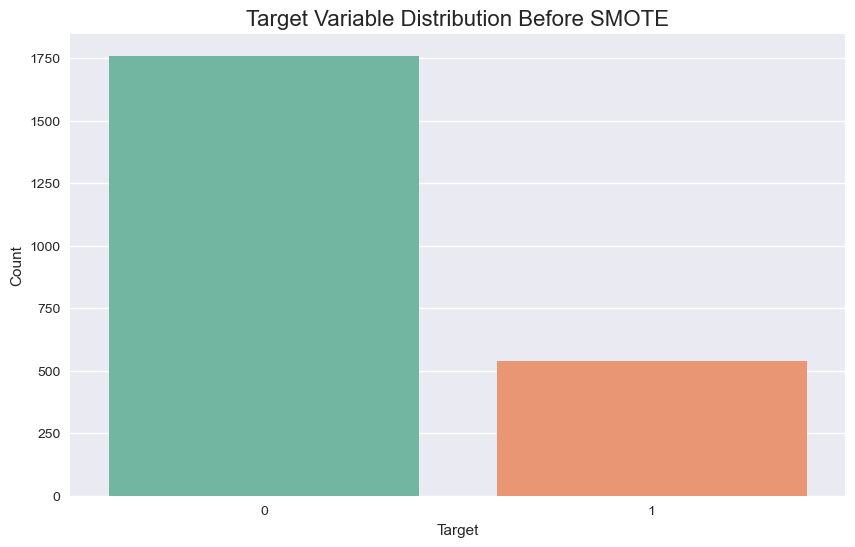

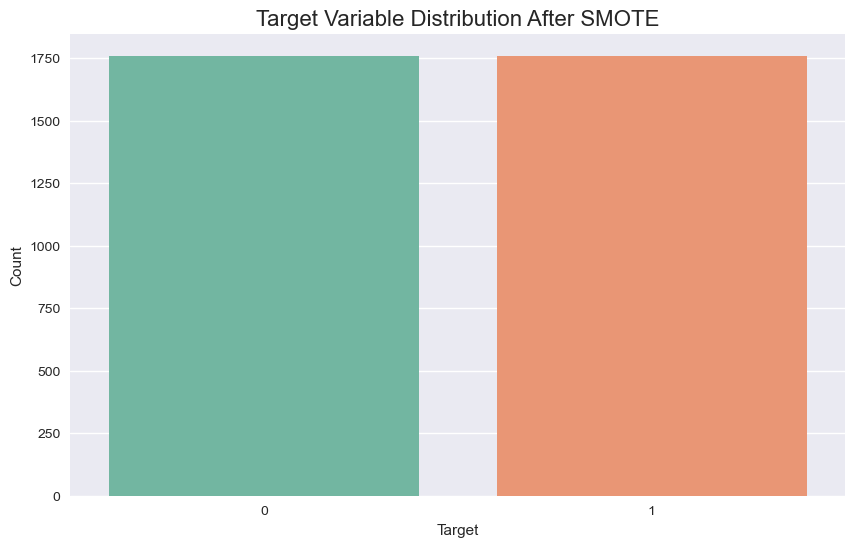

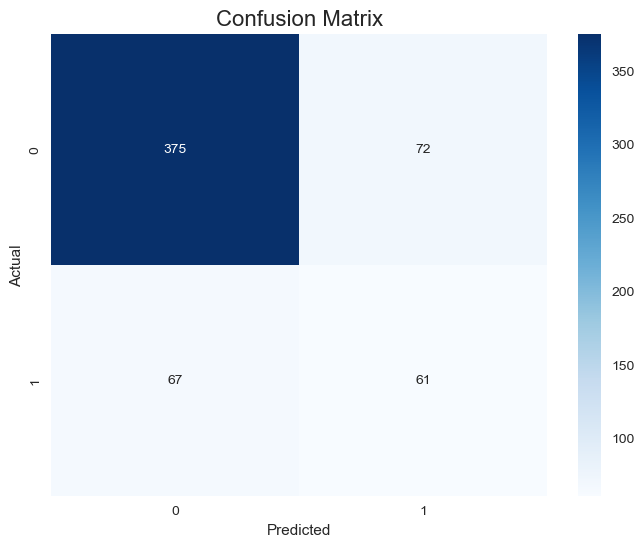

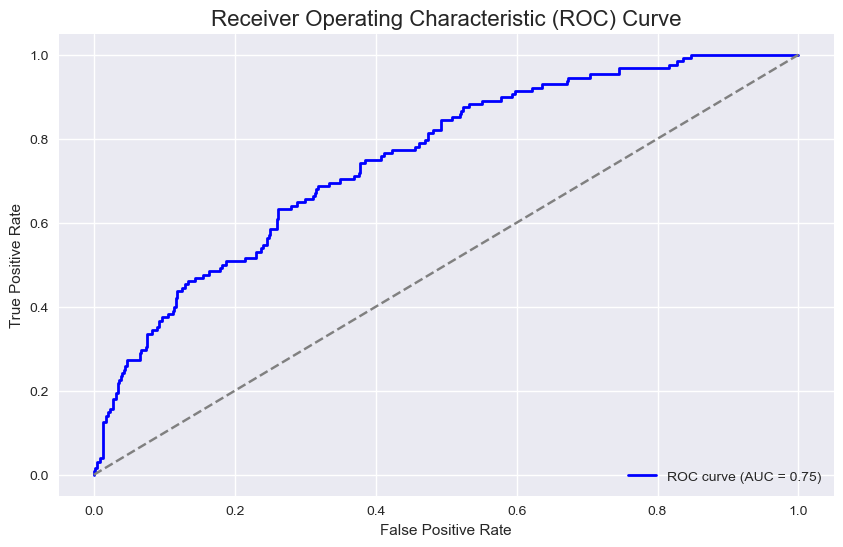

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# Assuming df_imputed is your input DataFrame
df = df_imputed

# Verify target column exists
if 'target' not in df.columns:
    print("Error: 'target' column not found in DataFrame.")
    exit()

# Convert target to categorical if it's continuous
# First, check if target is numeric
if pd.api.types.is_numeric_dtype(df['target']):
    # If you want to binarize based on a threshold
    threshold = df['target'].median()  # or any other threshold that makes sense for your data
    df['target'] = (df['target'] > threshold).astype(int)
    print(f"Target variable has been binarized using threshold: {threshold}")

# Encode categorical variables
le = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column] = le.fit_transform(df[column].astype(str))

# Remove specified variables
X = df.drop(columns=variables_to_drop, errors='ignore')
y = df['target']

print(f"\nNumber of features in X: {X.shape[1]}")
print(f"Number of samples in X: {X.shape[0]}")
print(f"Number of samples in y: {y.shape[0]}")
print(f"Target value distribution:\n{y.value_counts()}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE for class balancing
print("\nApplying SMOTE...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(f"Resampled training set distribution:\n{pd.Series(y_train_resampled).value_counts()}")

# Feature selection using GradientBoostingClassifier
print("\nSelecting features...")
sfm_selector = SelectFromModel(
    GradientBoostingClassifier(n_estimators=50, random_state=42),
    threshold="median"
)
X_train_selected = sfm_selector.fit_transform(X_train_resampled, y_train_resampled)
X_test_selected = sfm_selector.transform(X_test)

# Train AdaBoostClassifier
print("\nTraining AdaBoostClassifier...")
meta_classifier = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
meta_classifier.fit(X_train_selected, y_train_resampled)

# Make predictions
predictions = meta_classifier.predict(X_test_selected)
probabilities = meta_classifier.predict_proba(X_test_selected)[:, 1]

# Print results
print("\nClassification Results:")
print("Feature Selector: SelectFromModel, Classifier: AdaBoostClassifier")
print("\nClassification Report:")
print(classification_report(y_test, predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions))

# Calculate and display ROC AUC
roc_auc = roc_auc_score(y_test, probabilities)
print(f"\nROC AUC: {roc_auc:.4f}")

# Display selected features
selected_features = X.columns[sfm_selector.get_support()]
print("\nSelected Features:")
for i, feature in enumerate(selected_features, 1):
    print(f"{i}. {feature}")


# ----------------------------------------
# Visualizing Results with Graphs
# ----------------------------------------

# Gráfico 1: Distribuição das classes no conjunto original e após SMOTE
def plot_target_distribution(y_train, y_resampled):
    plt.figure(figsize=(10, 6))
    
    # Antes do SMOTE
    sns.countplot(x=y_train, palette='Set2')
    plt.title('Target Variable Distribution Before SMOTE', fontsize=16)
    plt.xlabel('Target')
    plt.ylabel('Count')
    plt.show()
    
    # Depois do SMOTE
    plt.figure(figsize=(10, 6))
    sns.countplot(x=y_resampled, palette='Set2')
    plt.title('Target Variable Distribution After SMOTE', fontsize=16)
    plt.xlabel('Target')
    plt.ylabel('Count')
    plt.show()

# Gráfico 2: Matriz de Confusão
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
    plt.title('Confusion Matrix', fontsize=16)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Gráfico 3: Curva ROC
def plot_roc_curve(y_true, y_prob):
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Exemplo de como usar as funções:
# 1. Plotar a distribuição de classes
plot_target_distribution(y_train, y_train_resampled)

# 2. Plotar a matriz de confusão
plot_confusion_matrix(y_test, predictions)

# 3. Plotar a curva ROC
plot_roc_curve(y_test, probabilities)


/var/folders/q3/ycc4hmlj3493q0x11zn3vgcc0000gn/T/ipykernel_72048/493171742.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


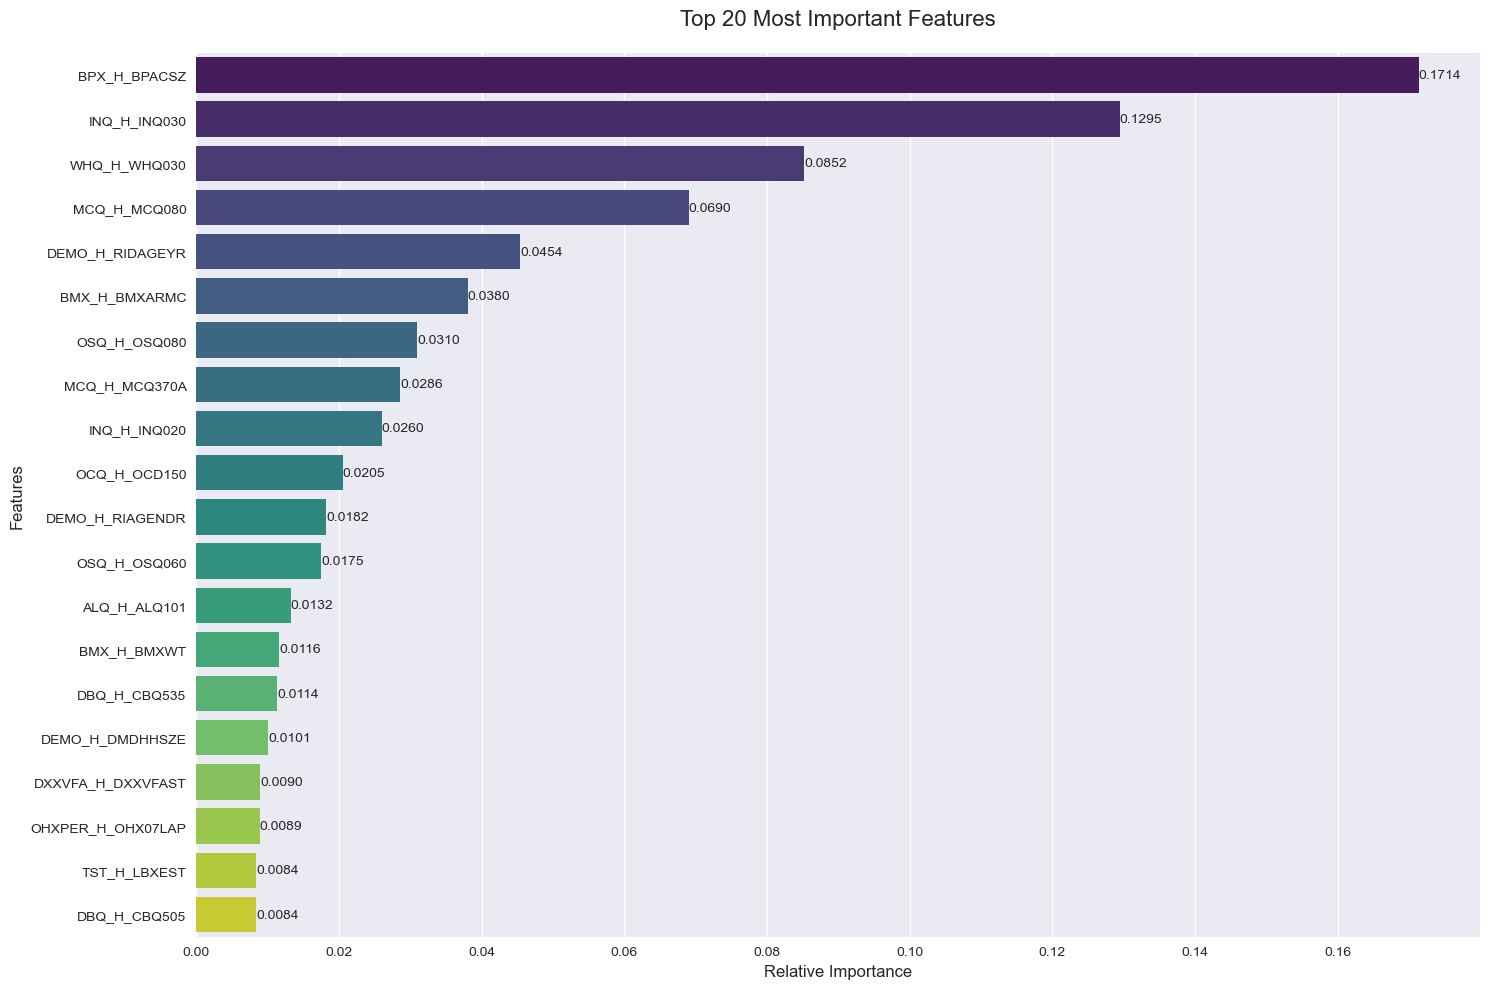


Feature Importance for All Features:
          feature  importance
     BPX_H_BPACSZ    0.171386
     INQ_H_INQ030    0.129462
     WHQ_H_WHQ030    0.085228
     MCQ_H_MCQ080    0.069002
  DEMO_H_RIDAGEYR    0.045448
    BMX_H_BMXARMC    0.038025
     OSQ_H_OSQ080    0.031009
    MCQ_H_MCQ370A    0.028595
     INQ_H_INQ020    0.025973
     OCQ_H_OCD150    0.020524
  DEMO_H_RIAGENDR    0.018246
     OSQ_H_OSQ060    0.017549
     ALQ_H_ALQ101    0.013247
      BMX_H_BMXWT    0.011614
     DBQ_H_CBQ535    0.011378
  DEMO_H_DMDHHSZE    0.010104
DXXVFA_H_DXXVFAST    0.008965
OHXPER_H_OHX07LAP    0.008913
     TST_H_LBXEST    0.008411
     DBQ_H_CBQ505    0.008357
     OHQ_H_OHQ875    0.008194
 OHXDEN_H_OHX30TC    0.008174
OHXPER_H_OHX09LAS    0.008127
     WHQ_H_WHQ040    0.007734
    MCQ_H_MCQ365A    0.006160
     DUQ_H_DUQ240    0.005750
DXXFEM_H_DXAFMRD0    0.005274
   DEMO_H_SDMVPSU    0.004956
DXXAAC_H_DXXAC8AN    0.004478
  DEMO_H_DMDHRGND    0.004257
     PFQ_H_PFQ057    0.004152
  

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier

# Obtain feature importance from the already trained SelectFromModel
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': sfm_selector.estimator_.feature_importances_
})

# Sort by importance
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Set plot style
plt.style.use('seaborn')
plt.figure(figsize=(15, 10))

# Create horizontal bar plot
sns.barplot(x='importance', y='feature', data=feature_importance.head(20), 
            palette='viridis')

# Customize the plot
plt.title('Top 20 Most Important Features', fontsize=16, pad=20)
plt.xlabel('Relative Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Add values on the bars
for i, v in enumerate(feature_importance['importance'].head(20)):
    plt.text(v, i, f'{v:.4f}', va='center', fontsize=10)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Print table with all features and their importances
print("\nFeature Importance for All Features:")
print(feature_importance.to_string(index=False))

# Calculate descriptive statistics for the importances
print("\nDescriptive Statistics of Feature Importances:")
print(feature_importance['importance'].describe())

# Save the results to a CSV file
feature_importance.to_csv('feature_importance_results.csv', index=False)


In [24]:
import pandas as pd

# Lista de todas as colunas a serem mantidas (incluindo as que têm valores associados)
colunas_selecionadas = [
    # Colunas originais
    "DEMO_H_RIAGENDR",
    "DEMO_H_RIDRETH1",
    "DXXFEM_H_DXXNKBMD",
    "DXXFEM_H_DXXOFBMD",
    "DXXSPN_H_DXXOSBMD",
    "DXXFEM_H_DXXTRBMD",
    "DXXFEM_H_DXXWDBMD", 
    "DXXFEM_H_DXXINBMD", 
    'DXXSPN_H_DXXOSBMD',
    "DXXSPN_H_DXXL1BMD",
    "DXXSPN_H_DXXL2BMD",
    "DXXSPN_H_DXXL3BMD",
    "DXXSPN_H_DXXL4BMD",
    # Colunas adicionais com valores
    "BPX_H_BPACSZ",
    "INQ_H_INQ030",
    "WHQ_H_WHQ030",
    "MCQ_H_MCQ080",
    "DEMO_H_RIDAGEYR",
    "BMX_H_BMXARMC",
    "OSQ_H_OSQ080",
    "MCQ_H_MCQ370A",
    "INQ_H_INQ020",
    "OCQ_H_OCD150",
    "DEMO_H_RIAGENDR",
    "OSQ_H_OSQ060",
    "ALQ_H_ALQ101",
    "BMX_H_BMXWT",
    "DBQ_H_CBQ535",
    "DEMO_H_DMDHHSZE",
    "DXXVFA_H_DXXVFAST",
    "OHXPER_H_OHX07LAP",
    "TST_H_LBXEST",
    "DBQ_H_CBQ505",
    "OHQ_H_OHQ875",
    "OHXDEN_H_OHX30TC",
    "OHXPER_H_OHX09LAS",
    "WHQ_H_WHQ040",
    "MCQ_H_MCQ365A",
    "DUQ_H_DUQ240",
    "DXXFEM_H_DXAFMRD0",
    "DEMO_H_SDMVPSU",
    "DXXAAC_H_DXXAC8AN",
    "DEMO_H_DMDHRGND",
    "PFQ_H_PFQ057",
    "BPX_H_PEASCST1",
    "TSNA_H_URDNABLC",
    "OHXPER_H_OHX20PCD",
    "COT_H_LBDHCTLC",
    "DEMO_H_AIALANGA",
    "DR2TOT_H_DR2_330Z",
    "PAQ_H_PAQ650",
    "DR1TOT_H_DRD370U",
    "DEMO_H_FIAINTRP",
    "DS1TOT_H_DS1DS",
    "DR2TOT_H_DR2BWATZ",
    "BIOPRO_H_LBXSAPSI",
    "DIQ_H_DIQ172",
    "DXXT4_H_DXXANTEH",
    "TSNA_H_URXNAB",
    "PAXDAY_H_PAXSSNDP",
    "DS1TOT_H_DR1LANG",
    "DR1TOT_H_DR1TCALC",
    "OHXPER_H_OHX09LAA",
    "DR1TOT_H_DR1_330Z",
    "FOLFMS_H_LBDSF3LC",
    "OHXPER_H_OHX13LAM",
    "WHQ_H_WHD020",
    "PAQ_H_PAQ635",
    "DR2TOT_H_WTDRD1",
    "HUQ_H_HUQ010",
    "DIQ_H_DIQ180",
    "DXXAAC_H_DXXAL2",
    "DR1IFF_H_DR1_020",
    "SMQSHS_H_SMQ866",
    "CSX_H_CSXLEAOD",
    "SLQ_H_SLQ060",
    "DEMO_H_DMQMILIZ",
    "CSQ_H_CSQ030",
    "DXXT6_H_DXXT6CC",
    "WHQ_H_WHD050",
    "FOLFMS_H_LBDFOTSI",
    "DEMO_H_DMDHREDU",
    "OHXPER_H_OHX15CJA",
    "OHXPER_H_OHX09CJD",
    "DS1TOT_H_DS1DSCNT",
    "DXXVFA_H_DXXT12FX",
    "BPX_H_BPXDI2",
    "DR1TOT_H_DR1TSFAT",
    "WHQ_H_WHD140",
    "OHXPER_H_OHX09CJA",
    "BMX_H_BMXHT",
    "DXXT7_H_DXXPT16Y",
    "DR2TOT_H_DR2TATOA",
    "OHXPER_H_OHX31CJS",
    "OHXPER_H_OHX08PCD",
    "MGX_H_MGXH2T1",
    "PAQ_H_PAQ605",
    "MGX_H_MGD130",
    "DXXT8_H_DXXPOSTH",
    "OHQ_H_OHQ033",
    "OHXPER_H_OHX04LAD",
    "DR2TOT_H_DR2DRSTZ"
]

# Criar novo DataFrame apenas com as colunas selecionadas
df_novo = df[colunas_selecionadas].copy()

# Verificar as dimensões do novo DataFrame
print(f"Dimensões do novo DataFrame: {df_novo.shape}")

# Verificar as primeiras linhas do novo DataFrame
print("\nPrimeiras linhas do novo DataFrame:")
print(df_novo.head())

# Verificar informações sobre o DataFrame
print("\nInformações do DataFrame:")
print(df_novo.info())

# Salvar o DataFrame em diferentes formatos
# CSV
df_novo.to_csv('variaveis_selecionadas.csv', index=False)
print("\nArquivo CSV salvo como 'variaveis_selecionadas.csv'")

# Excel
df_novo.to_excel('variaveis_selecionadas.xlsx', index=False)
print("Arquivo Excel salvo como 'variaveis_selecionadas.xlsx'")

# Pickle (formato binário do Python)
df_novo.to_pickle('variaveis_selecionadas.pkl')
print("Arquivo Pickle salvo como 'variaveis_selecionadas.pkl'")

# Verificar se todas as colunas foram incluídas corretamente
colunas_faltantes = [col for col in colunas_selecionadas if col not in df_novo.columns]
if colunas_faltantes:
    print("\nAtenção: As seguintes colunas não foram encontradas no DataFrame original:")
    for col in colunas_faltantes:
        print(f"- {col}")

Dimensões do novo DataFrame: (2874, 102)

Primeiras linhas do novo DataFrame:
   DEMO_H_RIAGENDR  DEMO_H_RIDRETH1  DXXFEM_H_DXXNKBMD  DXXFEM_H_DXXOFBMD  \
0              1.0              4.0             0.8392             0.9986   
1              1.0              3.0             0.8150             0.9910   
2              2.0              3.0             0.7220             0.8220   
3              1.0              1.0             0.8960             1.1730   
4              2.0              3.0             0.8060             0.9300   

   DXXSPN_H_DXXOSBMD  DXXFEM_H_DXXTRBMD  DXXFEM_H_DXXWDBMD  DXXFEM_H_DXXINBMD  \
0             1.0810             0.6578             0.5934             1.0158   
1             0.8940             0.6790             0.5730             1.2220   
2             0.9314             0.5260             0.5870             1.0150   
3             1.2190             0.8810             0.6370             1.4160   
4             1.0760             0.7690             0.